In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing Requisite Libraries

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all'

import warnings
warnings.filterwarnings('ignore')

%config InlineBackend.figure_format='retina'

In [ ]:
import tensorflow
from tensorflow import keras
from keras.models import  Sequential
from keras.layers import Dense, Dropout


Loading the dataset

In [ ]:
df = pd.read_csv(r"/content/drive/MyDrive/dataset/4.linearsep.csv", header = None)

In [ ]:
df.head()

,0,1,2
0,-0.177497,0.930496,1.0
1,1.977424,1.766155,0.0
2,1.800024,1.700343,0.0
3,-0.770837,2.359163,1.0
4,-0.308009,1.594063,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
 1   1       100 non-null    float64
 2   2       100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


Plotting the datapoints to identify shape

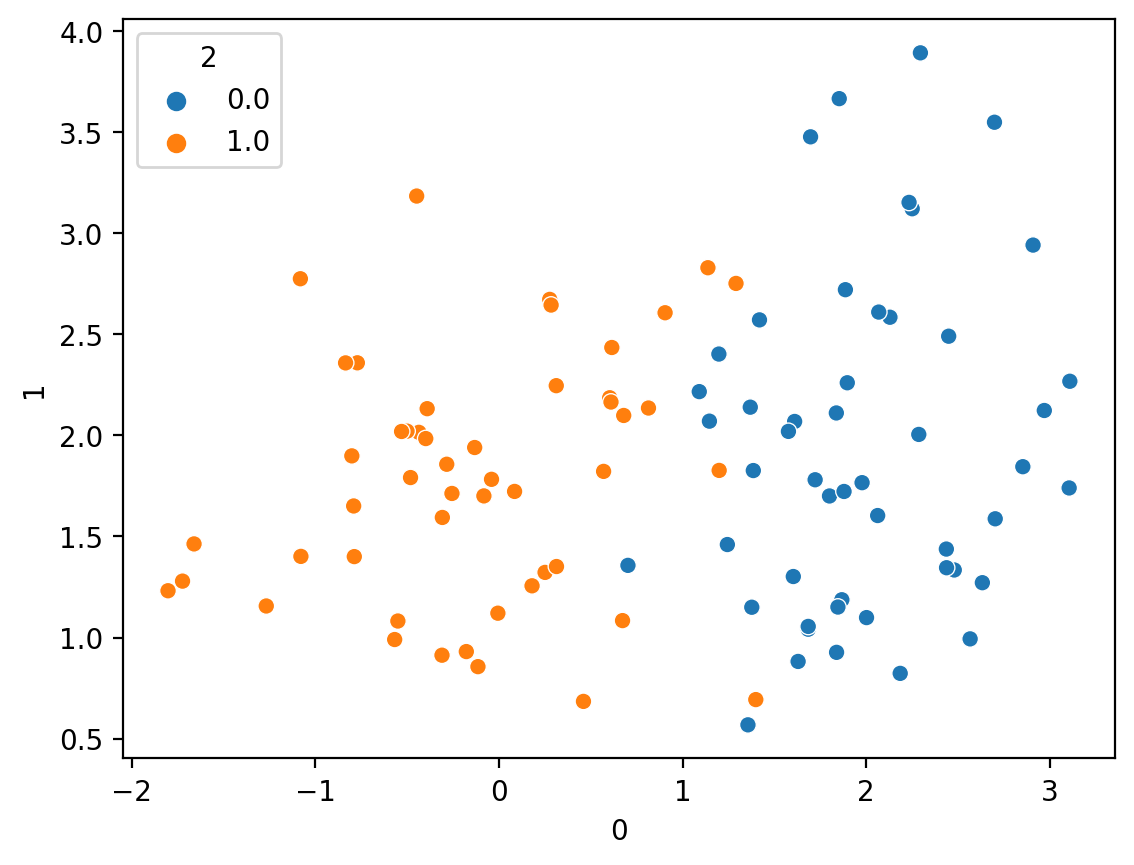

In [ ]:
sns.scatterplot(x = 0,y=1, hue = 2, data = df);

Performing train test split and Building MLP

In [ ]:
X = df[[0,1]]
y=df[2]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train_trans=std.fit_transform(X_train)

In [ ]:
X_test_trans = std.transform(X_test)

In [ ]:
model = Sequential()
model.add(Dense(12,activation='relu', input_dim = 2))
model.add(Dense(10,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(3,activation='relu'))
model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_106 (Dense)           (None, 12)                36        
                                                                 
 dense_107 (Dense)           (None, 10)                130       
                                                                 
 dense_108 (Dense)           (None, 8)                 88        
                                                                 
 dense_109 (Dense)           (None, 6)                 54        
                                                                 
 dense_110 (Dense)           (None, 5)                 35        
                                                                 
 dense_111 (Dense)           (None, 4)                 24        
                                                                 
 dense_112 (Dense)           (None, 3)               

Model Compilation and Training

In [ ]:
model.compile(optimizer='Adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train_trans,y_train,epochs = 60 ,validation_split = 0.2 )

Epoch 1/60
2/2 [==============================] - 4s 193ms/step - loss: 0.6930 - accuracy: 0.6875 - val_loss: 0.6931 - val_accuracy: 0.5625
Epoch 2/60
2/2 [==============================] - 0s 29ms/step - loss: 0.6929 - accuracy: 0.6719 - val_loss: 0.6930 - val_accuracy: 0.5625
Epoch 3/60
2/2 [==============================] - 0s 32ms/step - loss: 0.6927 - accuracy: 0.6562 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 4/60
2/2 [==============================] - 0s 31ms/step - loss: 0.6925 - accuracy: 0.6250 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 5/60
2/2 [==============================] - 0s 31ms/step - loss: 0.6923 - accuracy: 0.6094 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 6/60
2/2 [==============================] - 0s 48ms/step - loss: 0.6921 - accuracy: 0.6406 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 7/60
2/2 [==============================] - 0s 33ms/step - loss: 0.6918 - accuracy: 0.6406 - val_loss: 0.6924 - val_accuracy: 0.5000
Epoch 8/60
2/2 [==========

MLP Evaluation and Plotting decision surfaces

In [ ]:
Y_cap = model.predict(X_test_trans)

1/1 [==============================] - 0s 92ms/step


In [ ]:
Y_cap_f = np.where(Y_cap>0.5,1,0)

In [ ]:
Y_cap_f

array([[0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,Y_cap_f)

0.9

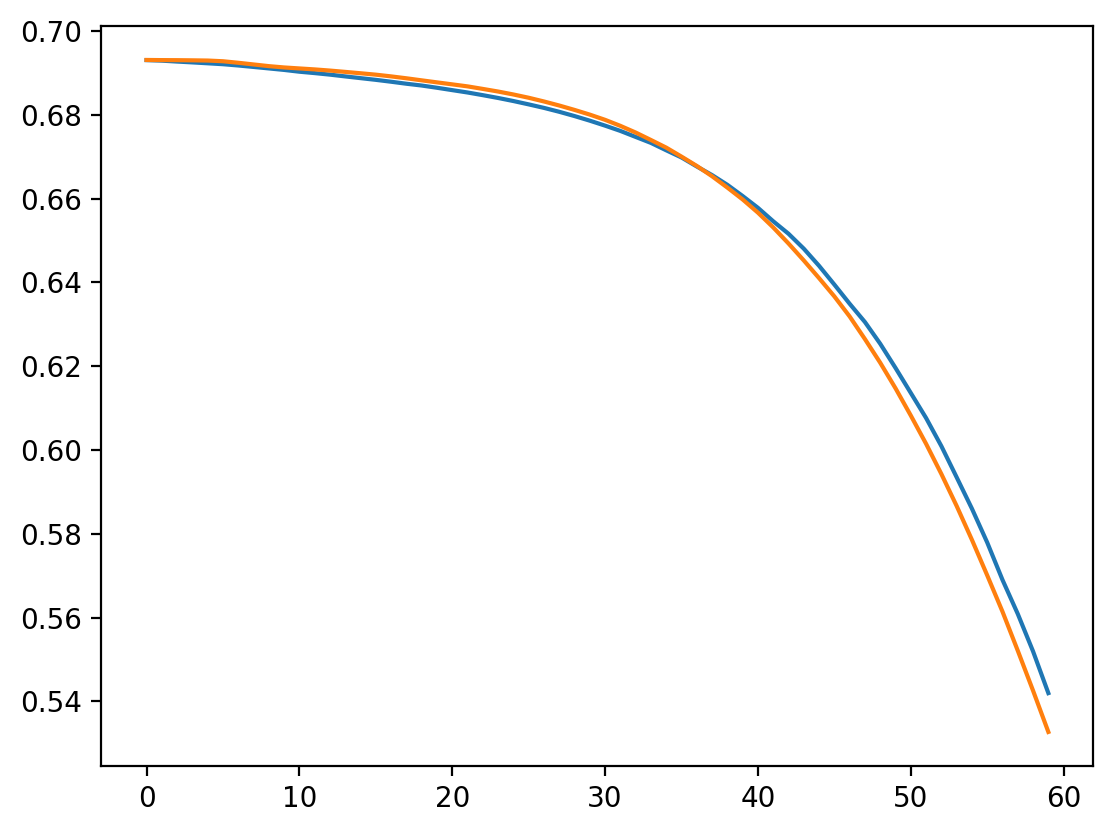

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']);

In [ ]:
!pip install mlxtend --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from mlxtend.plotting import plot_decision_regions

9600/9600 [==============================] - 15s 2ms/step


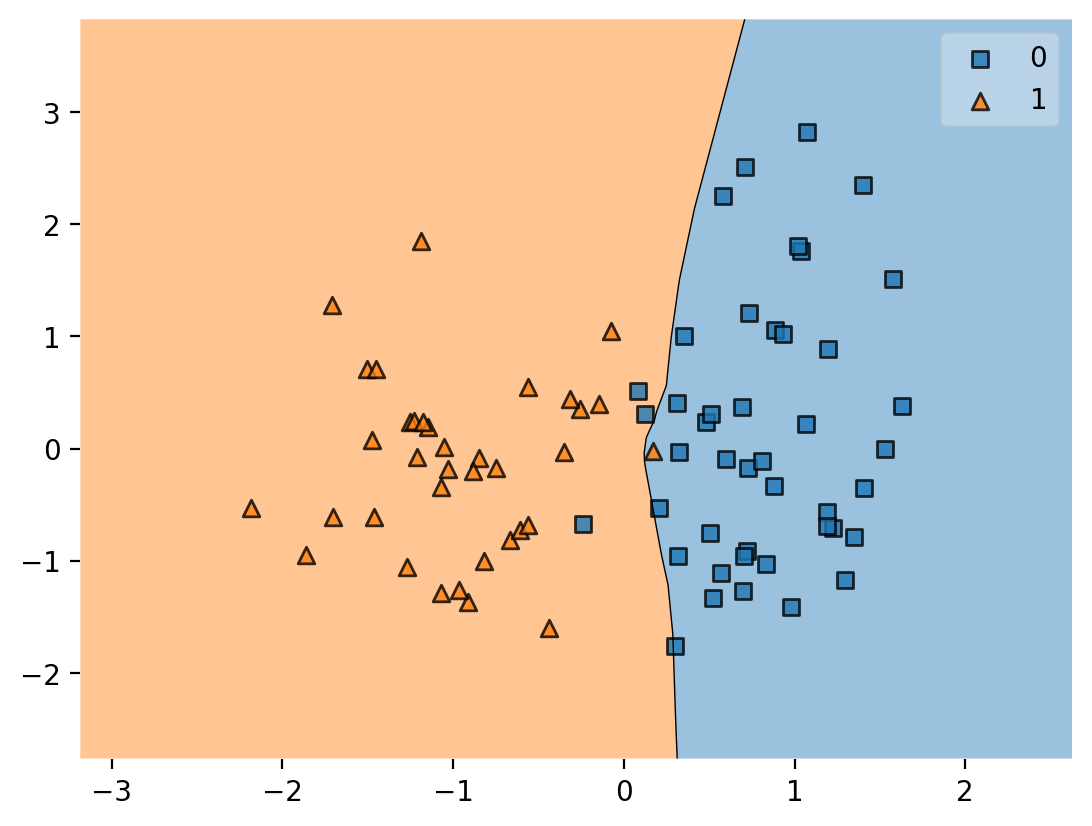

In [ ]:
plot_decision_regions(X_train_trans, y_train.values.astype(int), clf = model);

9600/9600 [==============================] - 15s 2ms/step


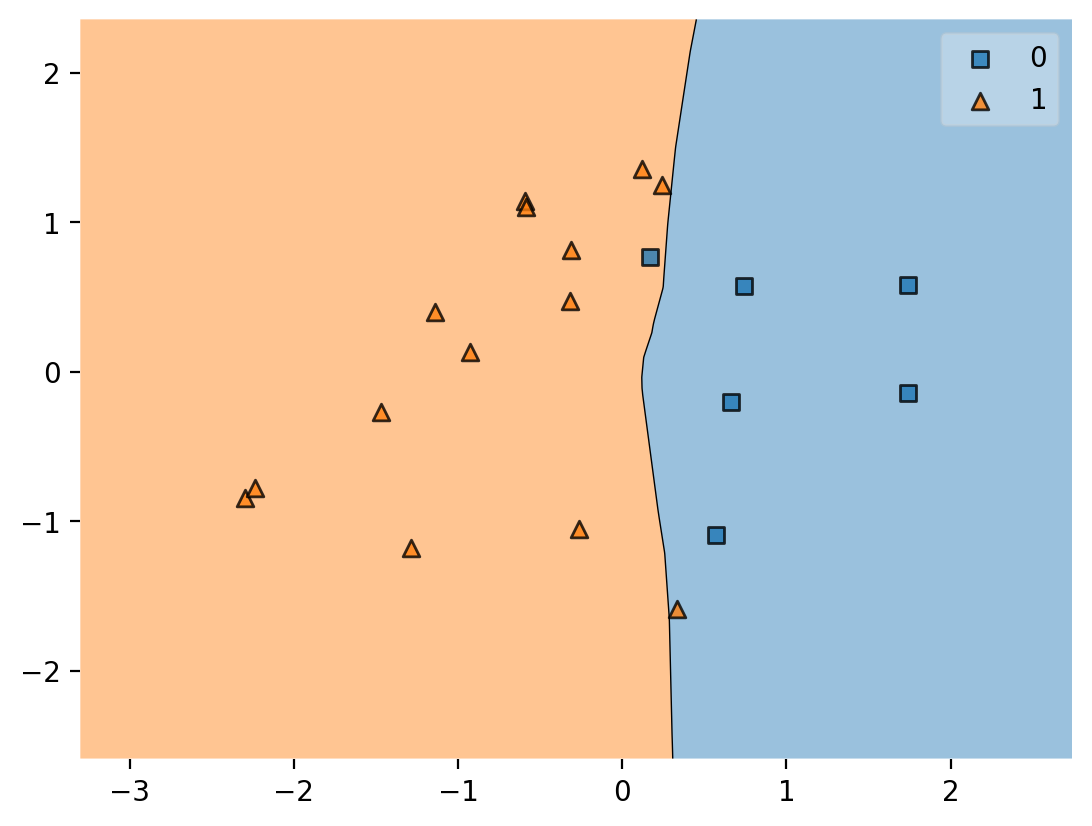

In [ ]:
plot_decision_regions(X_test_trans, y_test.values.astype(int), clf = model);